# 4.4 Arboles de decision

---

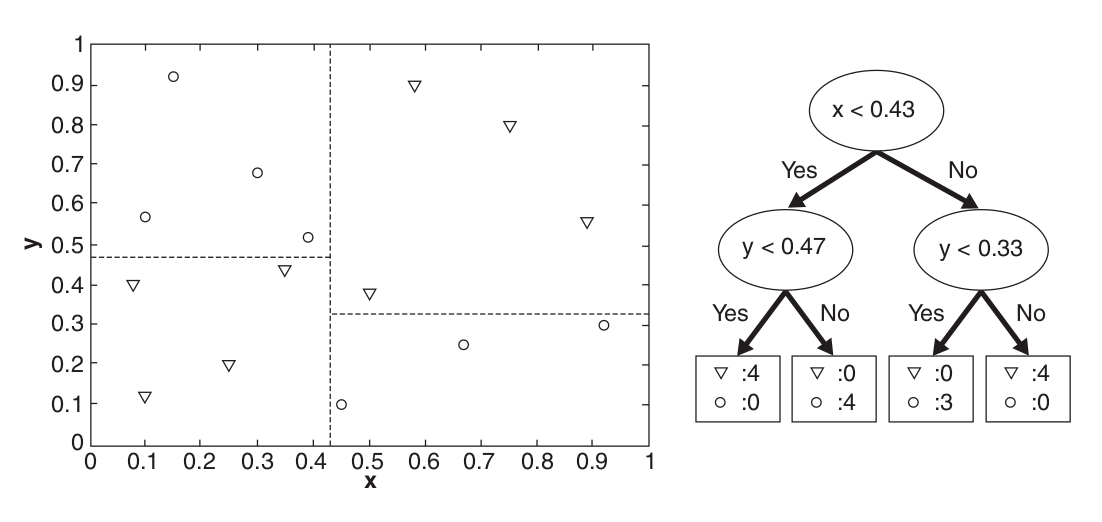El aprendizaje del árbol de decisiones es un método comúnmente utilizado en la minería de datos. El objetivo es crear un modelo que prediga el valor de una variable objetivo en función de varias variables de entrada.

Un árbol de decisión es una representación simple para clasificar ejemplos. Para esta sección, se supone que todas las entidades de entrada tienen dominios discretos finitos y que hay una única entidad de destino denominada "clasificación". Cada elemento del dominio de la clasificación se denomina clase. Un árbol de decisión o un árbol de clasificación es un árbol en el que cada nodo interno (no hoja) está etiquetado con una característica de entrada.

<img src='static/dtree.png' width="80%" height="80%">

Los algoritmos para construir árboles de decisión generalmente funcionan de arriba hacia abajo, eligiendo una variable en cada paso que mejor divida el conjunto de elementos. Diferentes algoritmos usan diferentes métricas para medir "lo mejor". Estos generalmente miden la homogeneidad de la variable objetivo dentro de los subconjuntos. A continuación se dan algunos ejemplos. Estas métricas se aplican a cada subconjunto candidato y los valores resultantes se combinan (por ejemplo, se promedian) para proporcionar una medida de la calidad de la división.

El proceso de hacer crecer un árbol de decisión se puede expresar como un algoritmo recursivo de la siguiente manera:

1) El primer nodo (raiz) es el principal que mejor clasifica, por lo tanto da mayor ganancia de información.

2) Se detiene el algoritmo cuando los nodos secundarios son puros o si no se puede mejorar la pureza de la clase (ya no se puede dividir más el nodo).

3) Vuelva al paso 1 para cada uno de los dos nodos secundarios.

Hay muchas medidas que se pueden usar para determinar la mejor manera de dividir los registros. Estas medidas se definen en términos de la distribución de clases de los registros antes y después de la partición. Sea $p(i|t)$ que denora la fracción de registros pertenecientes a la clase i en un nodo t dado. A veces omitimos la referencia al nodo t y expresamos la fracción como $p_i$ . En un problema de clasificación binaria, la distribución de clases en cualquier nodo se puede escribir como $(p_0 , p_1)$.

Las medidas desarrolladas para seleccionar la mejor división a menudo se basan en el grado de impureza de los nodos secundarios. Cuanto menor sea el grado de impureza, más sesgada será la distribución de clases. Por ejemplo, un nodo con distribución de clases (0, 1) tiene cero impurezas, mientras que un nodo con distribución de clases uniforme (0,5, 0,5) tiene la mayor impureza.

<img src='static/gini.png' width="50%" height="50%">

Comparación entre las medidas de impurezas para problemas de clasificación binaria.

<img src='static/p_impurity.png' width="50%" height="50%">
Entropia: La suma de las proba de que a un punto de corte "t", seas de la clase i dado t por el log_2(de la misma proba)
          esta proba se puede interpretar como cuantos elementos dado el punto de corte, se busca maximizar esta función para 
          determinar el punto de corte optimo

Gini y el error de clasificación explican practicamente lo mismo 


Ejemplo de un árbol de decisión y sus límites de decisión para un conjunto de datos bidimensional.

<img src='static/arbol.png' width="90%" height="90%">

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def scatterPlot(plt,datasetPD,col_1,col_2,colorDots='darkblue',label=None,shift=0.05,**kwargs):
    dataPD = datasetPD[[col_1,col_2]]
    plt.scatter(dataPD[col_1],dataPD[col_2],color=colorDots)
    if(label!=None):
        points = datasetPD[[col_1,col_2,label]].values
        for point in points:
            plt.text(point[0]+shift,point[1]+shift,str(point[2]))
    plt.axvline(**kwargs)
    plt.axhline(**kwargs)

def plot_confusion_matrix(plt,y_true, y_pred, figsize=(10,10), font_size=16):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax, annot_kws={"size": font_size})

### Iris Dataset
___

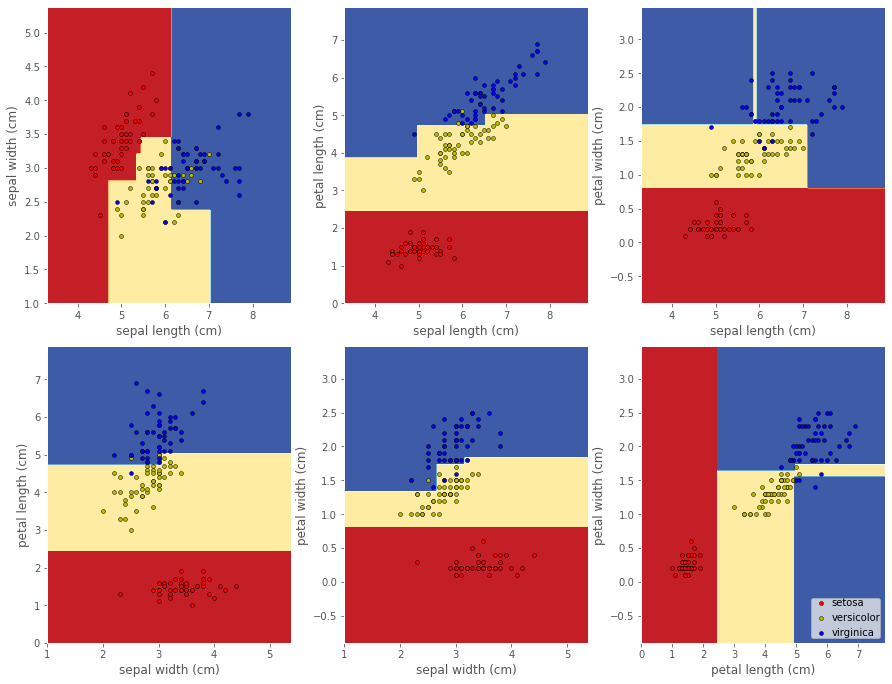

<Figure size 1080x720 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
iris = load_iris()
plt.figure(figsize=(13,10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4).fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure(figsize=(15,10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)

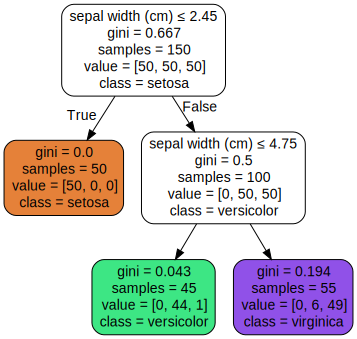

In [9]:
import graphviz 
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data[:, (1,2)]
y = iris.target

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2).fit(X, y)

dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=['sepal length (cm)','sepal width (cm)'],  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

### Loans Dataset
___

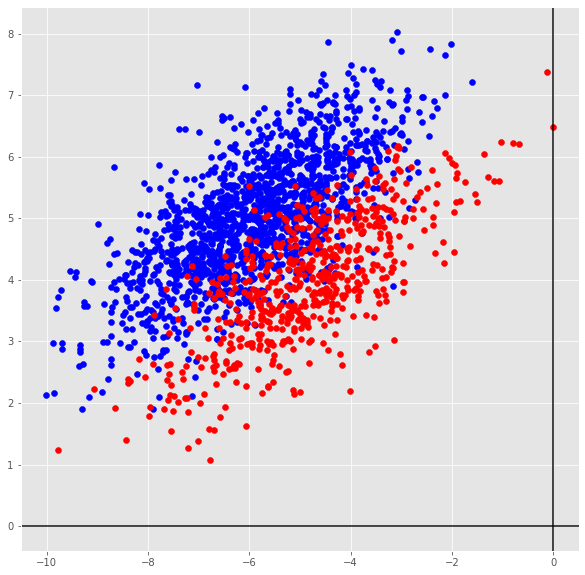

In [41]:
df = pd.read_csv('DataSets/loans_.csv')
df['fico_score'] = np.log(df['fico_score'])
df['income'] = np.log(df['income'])

plt.figure(figsize=(10,10))
scatterPlot(plt,df[df['loan_status']==0],'fico_score','income','Blue',color='Black',alpha=0.6)
scatterPlot(plt,df[df['loan_status']==1],'fico_score','income','Red',color='Black',alpha=0.6)

#matriz de datos
X = df[['fico_score','income']]
#variable objetivo
y = df['loan_status']

#arbol
clf = DecisionTreeClassifier(criterion = 'gini', #pureza de evaluación para los nodos  
                             splitter = 'best', # mejor separación posible
                             max_depth = 5 #profundiad numero de niveles del árbol, el máximo es el numero de registros que se tengan
                            ).fit(X, y)

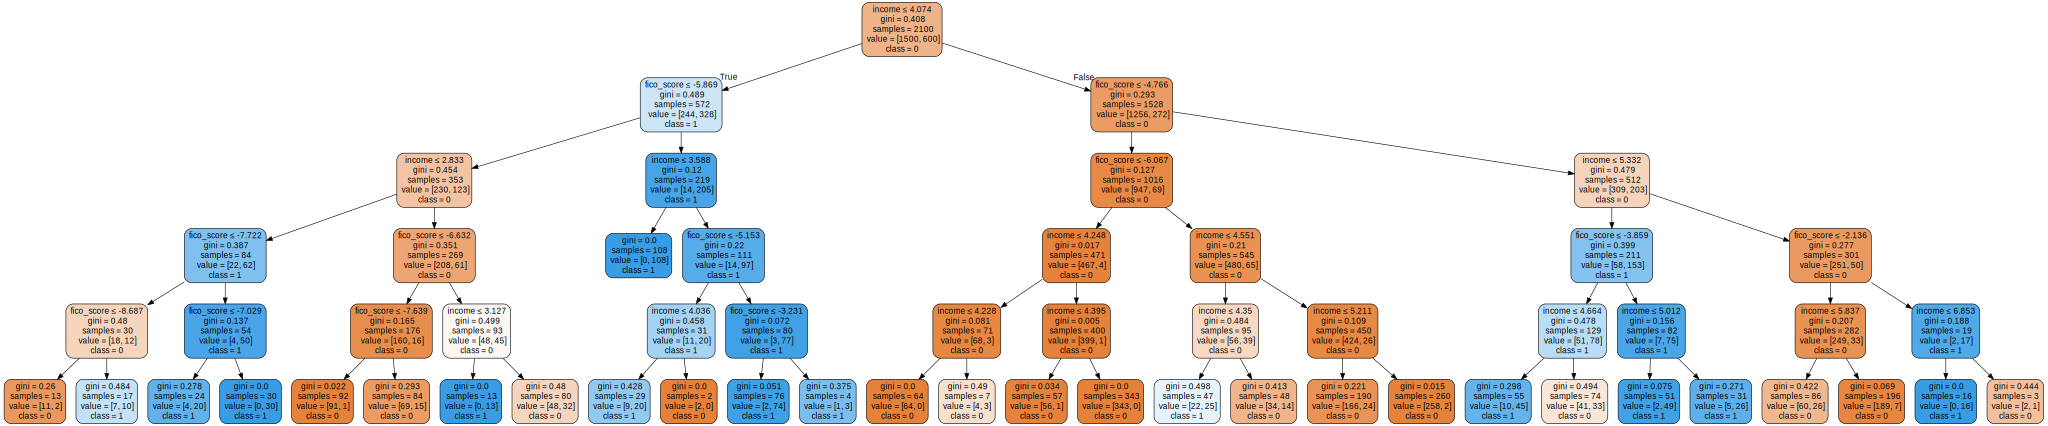

In [35]:
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=['fico_score','income'],  
    class_names=['0','1'],  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)
graph

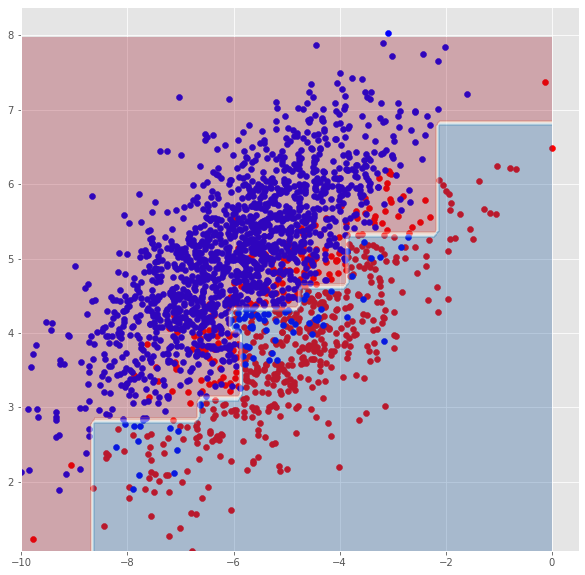

In [36]:
plt.figure(figsize=(10,10))
plot_step = 0.1
x_min, x_max = X['fico_score'].min(), X['fico_score'].max()
y_min, y_max = X['income'].min(), X['income'].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.15, w_pad=0.15, pad=0.15)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x=df[df['loan_status']==1]['fico_score'],
            y=df[df['loan_status']==1]['income'],
            color='red',
            alpha=1)

plt.scatter(x=df[df['loan_status']==0]['fico_score'],
            y=df[df['loan_status']==0]['income'],
            color='blue',
            alpha=1)
# frontera de decisión del arbol
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

## Sobreajustando el árbol

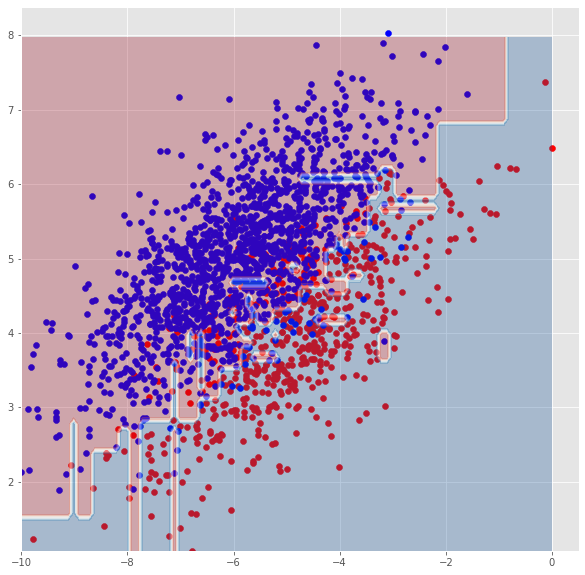

In [37]:
clf = DecisionTreeClassifier(criterion = 'gini', #pureza de evaluación para los nodos  
                             splitter = 'best', # mejor separación posible
                             max_depth = 10 #aumentar la profundidad sobreajusta el arbol 
                                            # el arbol pierde generalidad, hay 2^10 ramas
                            ).fit(X, y)

plt.figure(figsize=(10,10))
plot_step = 0.1
x_min, x_max = X['fico_score'].min(), X['fico_score'].max()
y_min, y_max = X['income'].min(), X['income'].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.15, w_pad=0.15, pad=0.15)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x=df[df['loan_status']==1]['fico_score'],
            y=df[df['loan_status']==1]['income'],
            color='red',
            alpha=1)

plt.scatter(x=df[df['loan_status']==0]['fico_score'],
            y=df[df['loan_status']==0]['income'],
            color='blue',
            alpha=1)
# frontera de decisión del arbol
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

## Subajuste del arbol

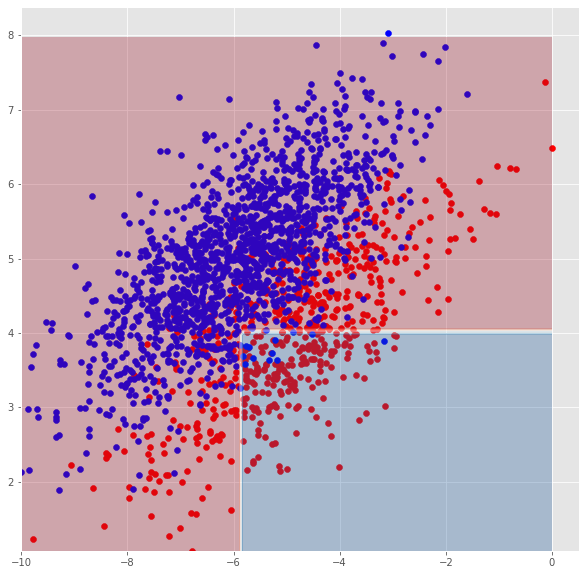

In [38]:
clf = DecisionTreeClassifier(criterion = 'gini', #pureza de evaluación para los nodos  
                             splitter = 'best', # mejor separación posible
                             max_depth = 2 #aumentar la profundidad sobreajusta el arbol 
                                            # el arbol pierde generalidad, hay 2^2 ramas
                            ).fit(X, y)

plt.figure(figsize=(10,10))
plot_step = 0.1
x_min, x_max = X['fico_score'].min(), X['fico_score'].max()
y_min, y_max = X['income'].min(), X['income'].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.15, w_pad=0.15, pad=0.15)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x=df[df['loan_status']==1]['fico_score'],
            y=df[df['loan_status']==1]['income'],
            color='red',
            alpha=1)

plt.scatter(x=df[df['loan_status']==0]['fico_score'],
            y=df[df['loan_status']==0]['income'],
            color='blue',
            alpha=1)
# frontera de decisión del arbol
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

Nota: antes de seguir ejecutando volver a correr el árbol donde la profundidad maxima es = 5

In [42]:
df['score'] = clf.predict_proba(X)[ : , 1 : ]
#ordenar de acuerdo a la predicción
df.sort_values('score',ascending = True, inplace=True)
#asignando ganancias genericas suponiendo un 25% de interes
df['profit'] = np.where(df['loan_status'] == 0, 
                        df.amount*1.25, 
                        -df.amount)

#ganancias acumuladas asegún avanzan los registros
df['cumulated_profit'] = df['profit'].cumsum()

#estableciendo el punto de corte optimo
threshold_row = df[df['cumulated_profit'] == df['cumulated_profit'].max()]
display(threshold_row)
threshold_cutoff = threshold_row['score'].values[0]

df['target_est'] = np.where(df['score']>=threshold_cutoff,1,0)
df

,fico_score,income,loan_status,amount,score,profit,cumulated_profit
1247,-5.65555,4.099482,0,312.248793,0.531915,390.310992,853353.247978


,fico_score,income,loan_status,amount,score,profit,cumulated_profit,target_est
1408,-6.096176,4.980437,0,886.731505,0.0,1108.414382,1108.414382,0
1306,-6.608242,5.069582,0,445.325871,0.0,556.657339,1665.071721,0
429,-6.615149,4.466588,0,310.580858,0.0,388.226073,2053.297793,0
427,-6.301127,5.537202,0,24.511476,0.0,30.639345,2083.937139,0
426,-6.265940,4.491890,0,477.356660,0.0,596.695825,2680.632964,0
...,...,...,...,...,...,...,...,...
696,-5.192735,3.380388,1,2095.191899,1.0,-2095.191899,614475.636648,1
1753,-5.654535,2.867117,1,57.434339,1.0,-57.434339,614418.202309,1
1419,-5.818294,2.547358,1,467.831156,1.0,-467.831156,613950.371153,1
1253,-6.883013,2.153043,1,286.912319,1.0,-286.912319,613663.458834,1


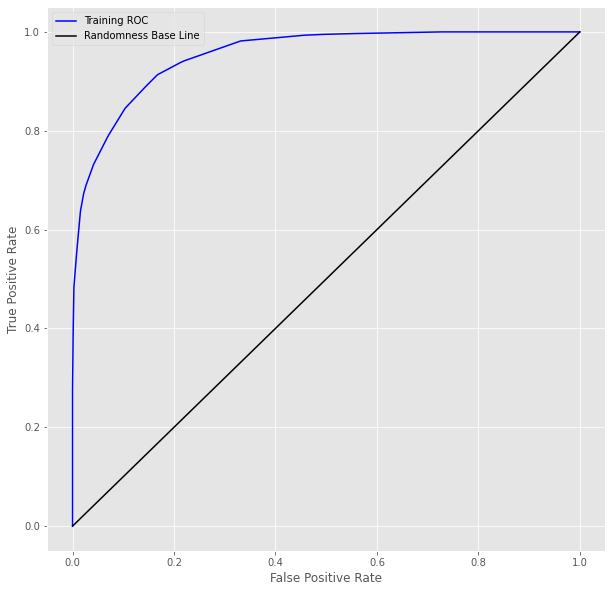

AUC: 0.9537116666666665
GINI: 0.907423333333333


In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, test_thresholds  = roc_curve(df['loan_status'], df['score'])

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linestyle='-', color='blue', label='Training ROC')
plt.plot([0,1],[0,1], color='black', label='Randomness Base Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('AUC:',roc_auc_score(df['loan_status'],df['score']))
print('GINI:',2*roc_auc_score(df['loan_status'],df['score'])-1)

HEAD:


,fico_score,income,loan_status,amount,score,profit,cumulated_profit,target_est
1408,-6.096176,4.980437,0,886.731505,0.0,1108.414382,1108.414382,0
1306,-6.608242,5.069582,0,445.325871,0.0,556.657339,1665.071721,0
429,-6.615149,4.466588,0,310.580858,0.0,388.226073,2053.297793,0
427,-6.301127,5.537202,0,24.511476,0.0,30.639345,2083.937139,0
426,-6.265940,4.491890,0,477.356660,0.0,596.695825,2680.632964,0


TAIL:


,fico_score,income,loan_status,amount,score,profit,cumulated_profit,target_est
696,-5.192735,3.380388,1,2095.191899,1.0,-2095.191899,614475.636648,1
1753,-5.654535,2.867117,1,57.434339,1.0,-57.434339,614418.202309,1
1419,-5.818294,2.547358,1,467.831156,1.0,-467.831156,613950.371153,1
1253,-6.883013,2.153043,1,286.912319,1.0,-286.912319,613663.458834,1
1832,-5.737860,2.160005,1,28.333336,1.0,-28.333336,613635.125498,1


OPTIMAL THRESHOLD CUTOFF SCORE VALUE:


,fico_score,income,loan_status,amount,score,profit,cumulated_profit
1247,-5.65555,4.099482,0,312.248793,0.531915,390.310992,853353.247978


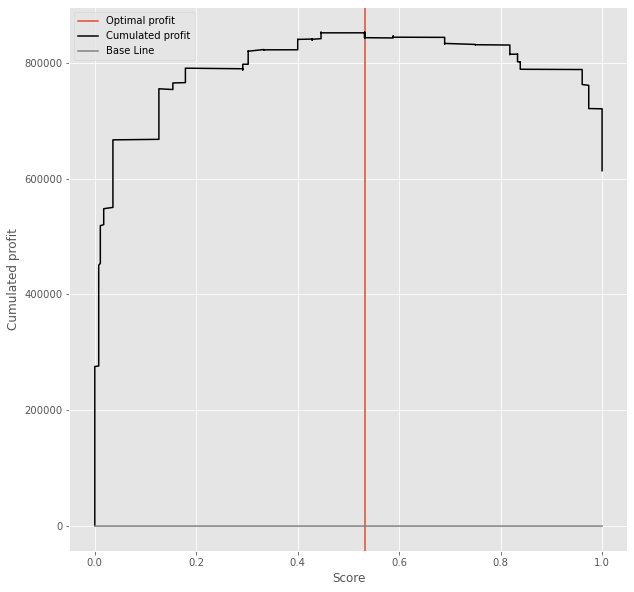

PRECISION: 0.8762475049900199
RECALL: 0.7316666666666667
F1: 0.7974568574023614
ACURACY: 0.8938095238095238
DENIED OPERATIONS: 501
DENIED PERCENTAGE: 0.23857142857142857


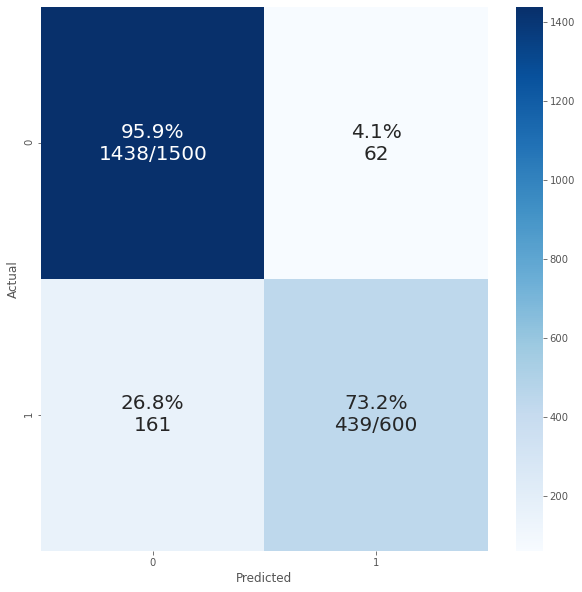

In [46]:
precision = precision_score(df['loan_status'],df['target_est'])
recall = recall_score(df['loan_status'],df['target_est'])
f1 = f1_score(df['loan_status'],df['target_est'])
accuracy = accuracy_score(df['loan_status'],df['target_est'])

print('HEAD:')
display(df.head(5))
print('TAIL:')
display(df.tail(5))
print('OPTIMAL THRESHOLD CUTOFF SCORE VALUE:')
display(threshold_row)

plt.figure(figsize=(10,10))
plt.axvline(x=threshold_cutoff,label='Optimal profit')
plt.plot(df['score'].values,df['cumulated_profit'].values, linestyle='-', color='Black', label='Cumulated profit')
plt.plot([1,0],[1,0], linestyle='-', color='Gray', label='Base Line')

plt.xlabel('Score')
plt.ylabel('Cumulated profit')
plt.legend()
plt.show()

print('PRECISION:',precision)
print('RECALL:',recall)
print('F1:',f1)
print('ACURACY:',accuracy)
print('DENIED OPERATIONS:',len(df[df['score']>=threshold_cutoff]))
print('DENIED PERCENTAGE:',len(df[df['score']>=threshold_cutoff])/len(df))

plot_confusion_matrix(plt,df['loan_status'],df['target_est'],figsize=(10,10),font_size=20)